# Analisis Perilaku Pelanggan Restoran Menggunakan Dataset Tips

Proyek ini bertujuan untuk mengeksplorasi pola perilaku pelanggan restoran melalui data transaksi tip.  
Analisis mencakup:

- Rata-rata tip berdasarkan gender, hari, dan waktu
- Perbandingan perilaku pelanggan perokok dan non-perokok
- Segmentasi pelanggan berdasarkan jumlah tip
- Identifikasi anomali dan korelasi antara total tagihan dan tip

**Tools:** Python (Pandas, Seaborn, Matplotlib)  
**Dataset:** `tips` dari library Seaborn (data dummy restoran)

## Data Understanding

In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset bawaan dari Seaborn
df = sns.load_dataset('tips')

# Tampilkan 5 data teratas
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Bentuk dataset
print(f"Jumlah baris dan kolom: {df.shape}")

# 5 data pertama
df.head()

# Distribusi nilai unik kolom kategorikal
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\nDistribusi kolom {col}:\n{df[col].value_counts()}")

Jumlah baris dan kolom: (244, 7)

Distribusi kolom sex:
sex
Male      157
Female     87
Name: count, dtype: int64

Distribusi kolom smoker:
smoker
No     151
Yes     93
Name: count, dtype: int64

Distribusi kolom day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Distribusi kolom time:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# cek missing value
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

tidak ada data yang kosong atau hilang

In [5]:
# Analisis Statistik Deskriptif
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 📊 Statistik Deskriptif (Total Bill, Tip, dan Size)
### 💵 Total Bill
- Rata-rata total tagihan adalah 19.79, dengan standar deviasi $8.90
- 50% pelanggan menghabiskan di bawah 17.80
- 25% pelanggan membayar kurang dari 13.35, dan 25% lainnya membayar lebih dari 24.13
- Total bill terkecil adalah 3.07, dan yang tertinggi adalah 50.81

📌 *Distribusi total bill menunjukkan bahwa restoran melayani berbagai jenis pelanggan: dari yang hemat hingga yang premium.*

---

### 💰 Tip
- Rata-rata tip yang diberikan pelanggan adalah 2.99, dengan standar deviasi 1.38
- Mayoritas tip berada di antara 2.00 hingga 3.56
- **Tip maksimum** mencapai 10.00, namun 25% pelanggan hanya memberi tip 2.00 atau kurang

📌 *Peluang besar untuk meningkatkan jumlah tip melalui pelayanan yang lebih baik, upselling, atau strategi lain.*

---

### 👥 Jumlah Orang per Meja (Size)
- Rata-rata jumlah orang dalam satu meja adalah **2.57 orang**
- 50% transaksi dilakukan oleh kelompok berisi **2 orang**
- Jumlah maksimum pelanggan per meja adalah **6 orang**, dan minimum **1 orang**

📌 *Sebagian besar pelanggan datang sendiri atau berpasangan, menunjukkan bahwa restoran ini cocok untuk pelanggan individu, pasangan, atau kelompok kecil.*


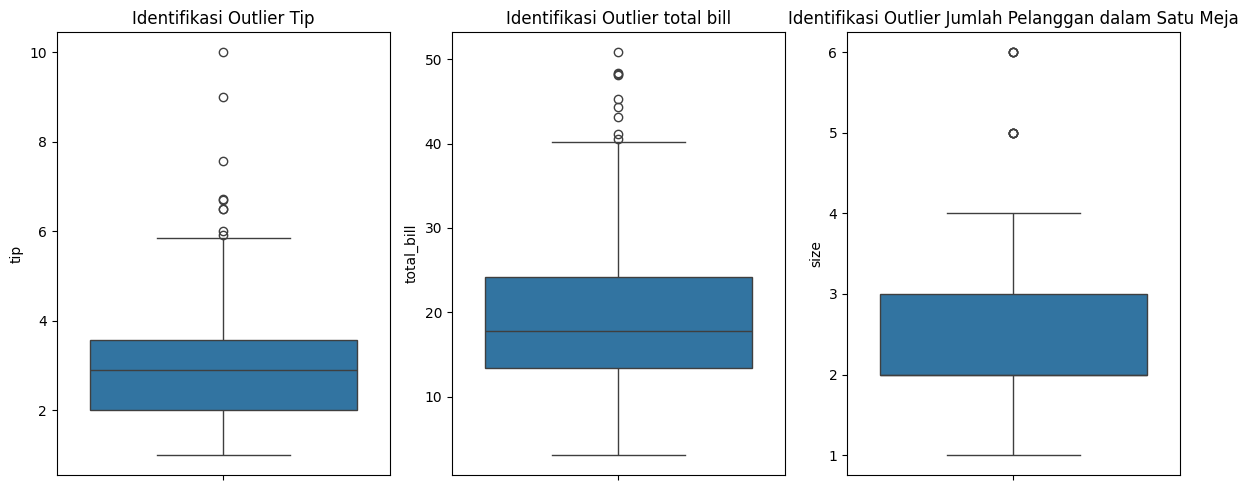

In [6]:
# Identifikasi Outlier Tips
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y=df.tip, ax=axes[0])
axes[0].set_title('Identifikasi Outlier Tip')

sns.boxplot(y=df.total_bill, ax=axes[1])
axes[1].set_title('Identifikasi Outlier total bill')

sns.boxplot(y=df['size'], ax=axes[2])
axes[2].set_title('Identifikasi Outlier Jumlah Pelanggan dalam Satu Meja')

plt.tight_layout()
plt.show()

### Identifikasi Outlier pada Variabel Tip

### 💰 Boxplot Tip
- Terdapat beberapa pelanggan yang memberikan tips cukup besar, yaitu 6-10, tetapi mayoritas memberi tips dibawah 6.

### 💵Total Bill
- Terdapat outlier yang cukup besar dalam total bill, yaitu berkisar antara $40-$50.

## 👥Jumlah Orang dalam Satu Meja
- Mayoritas pelanggan dalam satu meja terdapat 1-4 orang.
- Terdapat meja yang berisi 5-6 orang.
- Restoran lebih sering didatangi oleh pasangan atau kelompok kecil


## Data Cleaning

Karena tidak ditemukan missing value atau tipe data yang tidak sesuai, proses cleaning akan difokuskan pada:
- Konversi kolom kategorikal
- Duplikasi data
- Salinan data bersih

In [7]:
# Konversi Kolom Kategorial
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [8]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
# Cek duplikasi
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1


### 🔁 Pengecekan Duplikat

Langkah ini dilakukan untuk memastikan bahwa tidak ada data transaksi yang tercatat lebih dari sekali.  
Duplikat dapat menyebabkan analisis menjadi bias jika tidak ditangani.

Jika ditemukan duplikat yang tidak relevan, maka baris tersebut akan dihapus.


In [10]:
# Memunculkan data yang terduplikat
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [11]:
# Hapus duplikat berdasarkan semua kolom
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [13]:
df.shape

(243, 7)

## EDA

Bagian ini berisi eksplorasi awal untuk memahami pola dalam data.  
Beberapa fokus utama:
- Hubungan antara total tagihan dan tip
- Perilaku pelanggan berdasarkan gender, hari, waktu, dan status merokok
- Segmentasi pelanggan berdasarkan level tip

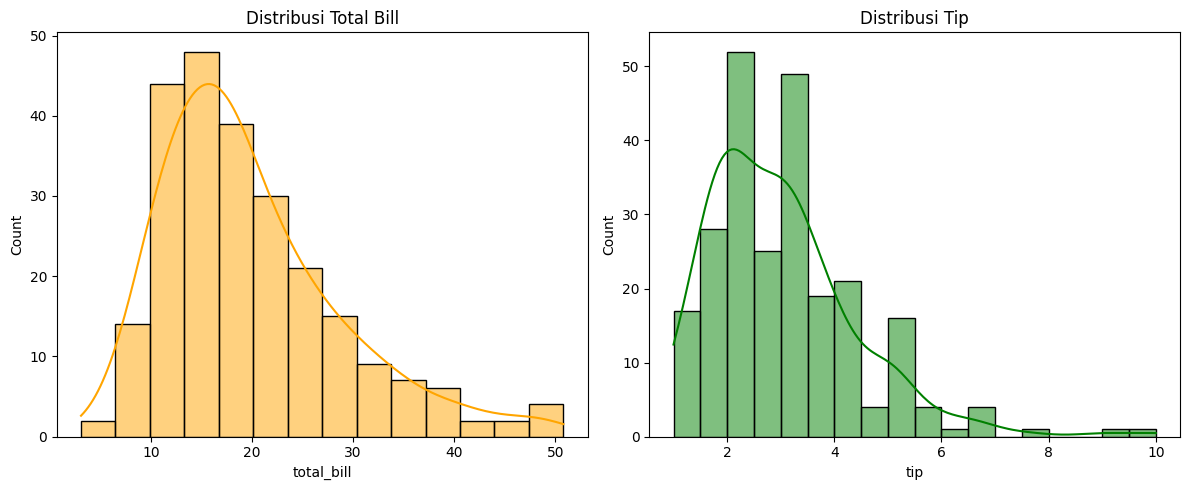

In [14]:
# Distribusi total_bill dan tip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['total_bill'], kde=True, ax=axes[0], color='orange')
axes[0].set_title("Distribusi Total Bill")

sns.histplot(df['tip'], kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribusi Tip")

plt.tight_layout()
plt.savefig("distribusi_hari.png", dpi=300, bbox_inches='tight')
plt.show()

### Distribusi Total Bill dan Tip
- Kedua gambar menunjukkan distribusi miring ke kanan (right skewed)
- Banyak pelanggan dengan total tagihan (bill) rendah hingga sedang. Pelanggan dengan total tagihan tinggi jarang atau sedikit
- Mayoritas pelanggan memberikan tips yang rendah

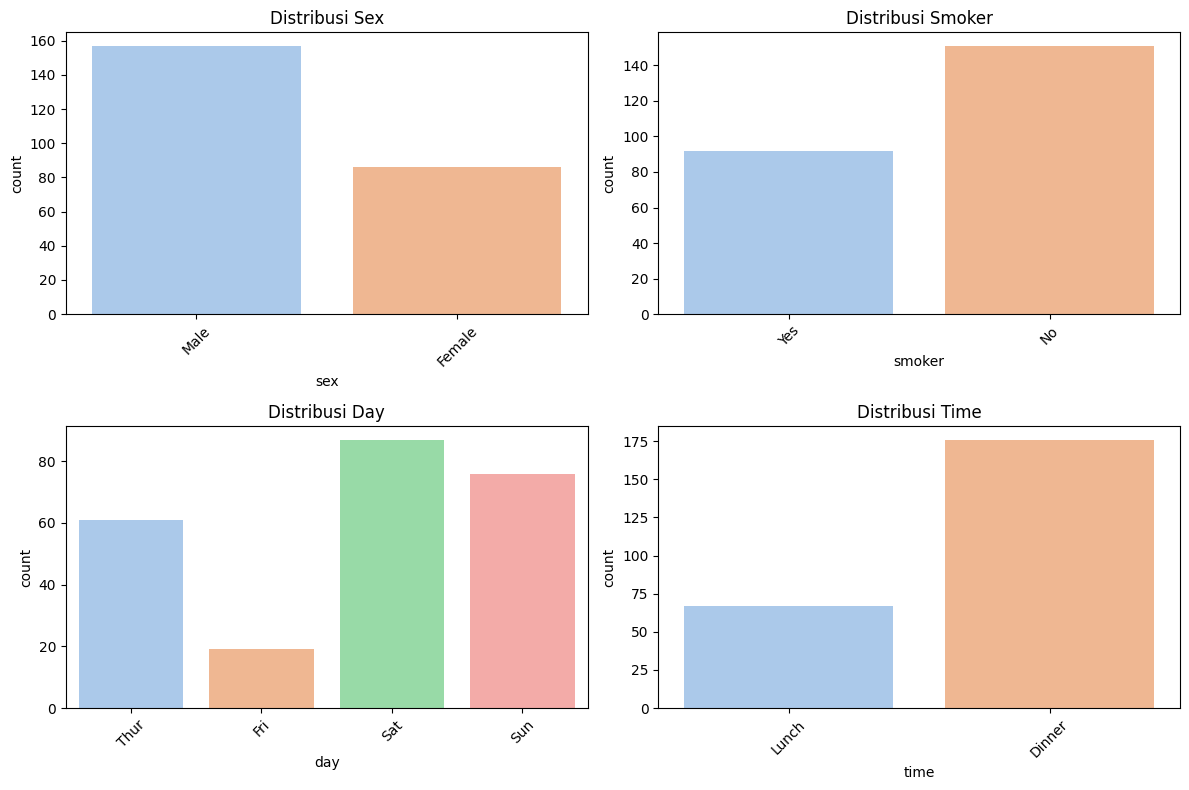

In [15]:
# Visualisasi bar untuk kolom kategorikal
cat_cols = ['sex', 'smoker', 'day', 'time']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, palette='pastel', hue=col, legend=False)
    plt.title(f"Distribusi {col.capitalize()}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribusi_kategorial.png", dpi=300, bbox_inches='tight')
plt.show()

### Distribusi Kategorial
- Pelanggan laki-laki lebih banyak daripada pelanggan perempuan
- Pelanggan yang tidak merokok lebih banyak daripada pelanggan yang tidak merokok
- Hari yang paling sering dikunjungi oleh pelanggan adalah hari Sabtu.
- Waktu yang sering didatangi oleh pelanggan adalah waktu makan malam (dinner)

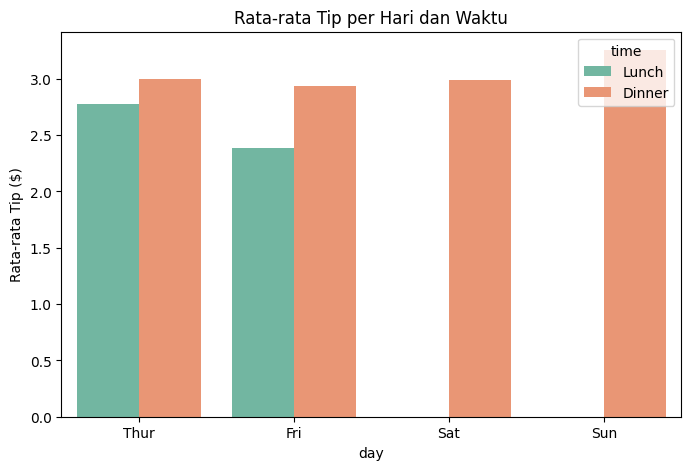

In [16]:
avg_tip = df.groupby(['day', 'time'], observed=True)['tip'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='tip', hue='time', data=avg_tip, palette='Set2')
plt.title("Rata-rata Tip per Hari dan Waktu")
plt.ylabel("Rata-rata Tip ($)")
plt.savefig("rata rata tips.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
avg_tip

,day,time,tip
0,Thur,Lunch,2.780500
1,Thur,Dinner,3.000000
2,Fri,Lunch,2.382857
3,Fri,Dinner,2.940000
4,Sat,Dinner,2.993103
5,Sun,Dinner,3.255132


Rata-rata tips yang diberikan pelanggan setiap harinya sekitar 3.0, tetapi pada hari minggu saat waktu makan malam rata-rata tips yang diberikan pelanggan lebih besar dibanding hari-hari lainnya.

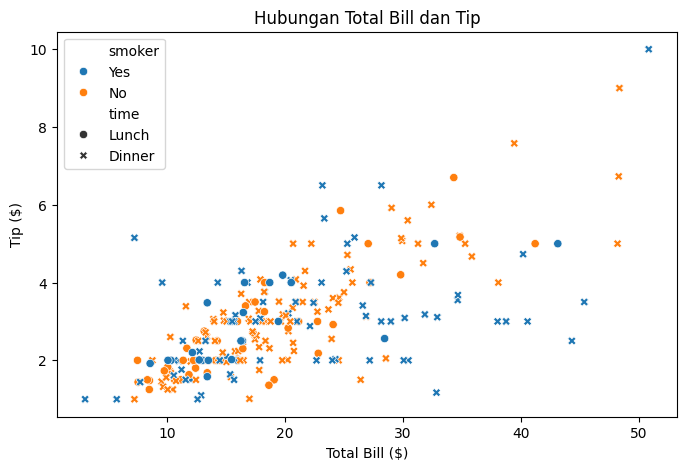

In [18]:
# Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='smoker', style='time')
plt.title("Hubungan Total Bill dan Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.savefig("Hubungan Total Bill dan Tip", dpi=300, bbox_inches='tight')
plt.show()

- semakin tinggi total bill, maka semakin besar tips yang diberikan oleh pelanggan
- tips yang besar (diatas 6) lebih sering diberikan oleh pelanggan yang tidak merokok
- pelanggan lebih sering berkunjung pada saat waktu makan malam. 
- waktu makan malam lebih banyak menghasilkan tips. 

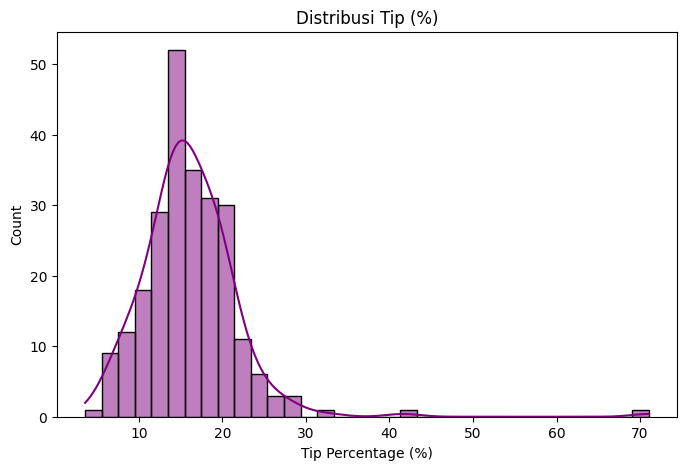

In [19]:
df['tip_pct'] = df['tip'] / df['total_bill'] * 100

plt.figure(figsize=(8, 5))
sns.histplot(df['tip_pct'], kde=True, color='purple')
plt.title("Distribusi Tip (%)")
plt.xlabel("Tip Percentage (%)")
plt.savefig("distribusi_tip(persen).png", dpi=300, bbox_inches='tight')
plt.show()


- Distribusi miring ke kanan (right skewed)
- mayoritas pelanggan hanya memberikan tips 10-20% dari total tagihan.
- tips tertinggi mencapai 70%, tetapi sangat jarang.